In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\ASUS\Desktop\Applied_AI_Course\Ritu Project\Feeder data for ANN.csv")
data.head()

,1,40,50,50.1,135.13
0,2,12,75,50,25.63
1,3,16,25,30,32.93
2,4,12,25,50,25.22
3,5,24,50,50,69.41
4,6,32,75,30,80.22


In [3]:
data.shape

(89, 5)

In [4]:
data.columns=['sl', 'No. of metering holes', 'Drum fill level (%)','Shaft speed (rpm)','Feed rate (kg/ha)']

In [5]:
# Separate Target Variable and Predictor Variables
X=data[['No. of metering holes', 'Drum fill level (%)','Shaft speed (rpm)']]
y=data[['Feed rate (kg/ha)']]
print(X,y)

    No. of metering holes  Drum fill level (%)  Shaft speed (rpm)
0                      12                   75                 50
1                      16                   25                 30
2                      12                   25                 50
3                      24                   50                 50
4                      32                   75                 30
..                    ...                  ...                ...
84                      8                   25                 50
85                     36                   50                 40
86                      4                   75                 50
87                     20                   75                 40
88                     16                   50                 50

[89 rows x 3 columns]     Feed rate (kg/ha)
0               25.63
1               32.93
2               25.22
3               69.41
4               80.22
..                ...
84              15.05
85       

In [6]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62, 3)
(62, 1)
(27, 3)
(27, 1)


In [7]:
# Code for extracting x, y train and test into an excel file

'''
traindata=pd.DataFrame(TargetVarScalerFit.inverse_transform(y_test))
traindata.to_excel('y_test(ANN).xlsx', sheet_name='sheet1', index=False)

'''

"\ntraindata=pd.DataFrame(TargetVarScalerFit.inverse_transform(y_test))\ntraindata.to_excel('y_test(ANN).xlsx', sheet_name='sheet1', index=False)\n\n"

In [8]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=3, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 1ms/step - loss: 1.1180
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 1.1176
Epoch 3/50
4/4 [==============================] - 0s 359us/step - loss: 1.1172
Epoch 4/50
4/4 [==============================] - 0s 0s/step - loss: 1.1170
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1168
Epoch 6/50
4/4 [==============================] - 0s 999us/step - loss: 1.1165
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 1.1159
Epoch 8/50
4/4 [==============================] - 0s 1000us/step - loss: 1.1154
Epoch 9/50
4/4 [==============================] - 0s 667us/step - loss: 1.1150
Epoch 10/50
4/4 [==============================] - 0s 666us/step - loss: 1.1143
Epoch 11/50
4/4 [==============================] - 0s 1ms/step - loss: 1.1134
Epoch 12/50
4/4 [==============================] - 0s 666us/step - loss: 1.1121
Epoch 13/50
4/4 [==============================] - 0s 667us/s

## Finding best set of parameters using manual grid search

In [9]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100, 500]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 70ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 121.92948442365787
1/1 [==============================] - 0s 31ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 113.15920761514882
1/1 [==============================] - 0s 26ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 93.0703256828271
1/1 [==============================] - 0s 27ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 98.32445854941157
1/1 [==============================] - 0s 41ms/step
5 Parameters: batch_size: 5 - epochs: 500 Accuracy: 111.57095302480103
1/1 [==============================] - 0s 35ms/step
6 Parameters: batch_size: 10 - epochs: 5 Accuracy: 119.52476343239266
1/1 [==============================] - 0s 27ms/step
7 Parameters: batch_size: 10 - epochs: 10 Accuracy: 122.27840732191204
1/1 [==============================] - 0s 25ms/step
8 Parameters: batch_size: 10 - epochs: 50 Accuracy: 102.8800101308658
1/1 [====================

<AxesSubplot:xlabel='Parameters'>

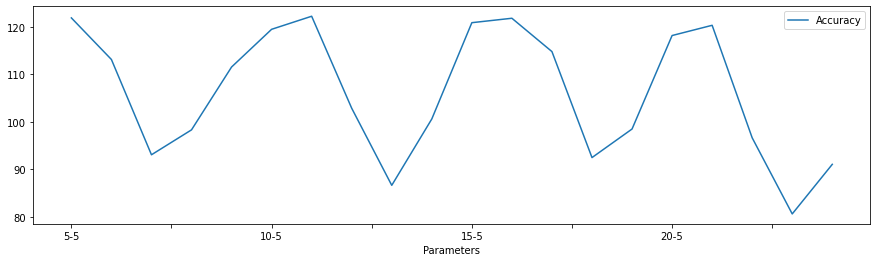

In [10]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [22]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 350, verbose=0)

# Generating Predictions on training data
Predictions=model.predict(X_train)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_train_orig=TargetVarScalerFit.inverse_transform(y_train)

# Scaling the test data back to original scale
Train_Data=PredictorScalerFit.inverse_transform(X_train)

TrainingData=pd.DataFrame(data=Train_Data, columns=['No. of metering holes', 'Drum fill level (%)','Shaft speed (rpm)'])
TrainingData['Feed rate (kg/ha)']=y_train_orig
TrainingData['Predicted Feed rate (kg/ha)']=Predictions
TrainingData.head()


2/2 [==============================] - 0s 2ms/step


,No. of metering holes,Drum fill level (%),Shaft speed (rpm),Feed rate (kg/ha),Predicted Feed rate (kg/ha)
0,40.0,75.0,40.0,93.73,92.401207
1,4.0,25.0,40.0,10.35,10.716393
2,36.0,50.0,30.0,157.16,157.040039
3,16.0,25.0,50.0,26.67,33.228558
4,36.0,75.0,50.0,85.72,82.828735


In [24]:
# Computing the absolute percent error
APE=100*(abs(TrainingData['Feed rate (kg/ha)']-TrainingData['Predicted Feed rate (kg/ha)'])/TrainingData['Feed rate (kg/ha)'])
TrainingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TrainingData.head()

The Accuracy of ANN model is: 90.3368434987109


,No. of metering holes,Drum fill level (%),Shaft speed (rpm),Feed rate (kg/ha),Predicted Feed rate (kg/ha),APE
0,40.0,75.0,40.0,93.73,92.401207,1.417682
1,4.0,25.0,40.0,10.35,10.716393,3.540024
2,36.0,50.0,30.0,157.16,157.040039,0.076330
3,16.0,25.0,50.0,26.67,33.228558,24.591517
4,36.0,75.0,50.0,85.72,82.828735,3.372917


In [25]:
TrainingData.to_excel('Training data results by ANN.xlsx', sheet_name='sheet1', index=False)

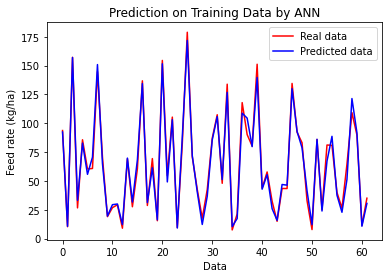

In [57]:
import matplotlib.pyplot as plt

plt.plot(TrainingData['Feed rate (kg/ha)'], color = 'red', label = 'Real data')
plt.plot(TrainingData['Predicted Feed rate (kg/ha)'], color = 'blue', label = 'Predicted data')
plt.title('Prediction on Training Data by ANN')
plt.xlabel('Data')
plt.ylabel('Feed rate (kg/ha)')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Squared Error :', mean_squared_error(TrainingData['Feed rate (kg/ha)'], TrainingData['Predicted Feed rate (kg/ha)']))
from sklearn.metrics import r2_score
r2 = r2_score(TrainingData['Feed rate (kg/ha)'], TrainingData['Predicted Feed rate (kg/ha)'])
print('The co-efficient of determination = ', r2)
print("RMSE",np.sqrt(mean_squared_error(TrainingData['Feed rate (kg/ha)'], TrainingData['Predicted Feed rate (kg/ha)'])))

Mean Squared Error : 31.381405382912952
The co-efficient of determination =  0.9835266008886249
RMSE 5.6019108688833095


## Testing ANN

In [31]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 350, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=['No. of metering holes', 'Drum fill level (%)','Shaft speed (rpm)'])
TestingData['Feed rate (kg/ha)']=y_test_orig
TestingData['Predicted Feed rate (kg/ha)']=Predictions
TestingData.head()

1/1 [==============================] - 0s 9ms/step


,No. of metering holes,Drum fill level (%),Shaft speed (rpm),Feed rate (kg/ha),Predicted Feed rate (kg/ha)
0,12.0,50.0,50.0,32.73,30.850895
1,28.0,25.0,40.0,97.57,88.727936
2,8.0,50.0,50.0,19.94,21.948238
3,24.0,50.0,30.0,84.35,85.258713
4,24.0,25.0,50.0,50.12,54.738121


In [33]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Feed rate (kg/ha)']-TestingData['Predicted Feed rate (kg/ha)'])/TestingData['Feed rate (kg/ha)'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 92.28076355391539


,No. of metering holes,Drum fill level (%),Shaft speed (rpm),Feed rate (kg/ha),Predicted Feed rate (kg/ha),APE
0,12.0,50.0,50.0,32.73,30.850895,5.741232
1,28.0,25.0,40.0,97.57,88.727936,9.062278
2,8.0,50.0,50.0,19.94,21.948238,10.071406
3,24.0,50.0,30.0,84.35,85.258713,1.077312
4,24.0,25.0,50.0,50.12,54.738121,9.214128


In [36]:
TestingData.to_excel('Testing data results by ANN.xlsx', sheet_name='sheet1', index=False)

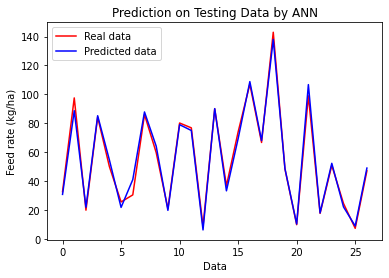

In [58]:
import matplotlib.pyplot as plt

plt.plot(TestingData['Feed rate (kg/ha)'], color = 'red', label = 'Real data')
plt.plot(TestingData['Predicted Feed rate (kg/ha)'], color = 'blue', label = 'Predicted data')
plt.title('Prediction on Testing Data by ANN')
plt.xlabel('Data')
plt.ylabel('Feed rate (kg/ha)')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Squared Error :', mean_squared_error(TestingData['Feed rate (kg/ha)'], TestingData['Predicted Feed rate (kg/ha)']))
from sklearn.metrics import r2_score
r2 = r2_score(TestingData['Feed rate (kg/ha)'], TestingData['Predicted Feed rate (kg/ha)'])
print('The co-efficient of determination = ', r2)
print("RMSE",np.sqrt(mean_squared_error(TestingData['Feed rate (kg/ha)'], TestingData['Predicted Feed rate (kg/ha)'])))

Mean Squared Error : 15.093505749299156
The co-efficient of determination =  0.9874471027543894
RMSE 3.8850361323029103


In [40]:
TestingData.to_excel('Testing data results by ANN.xlsx', sheet_name='sheet1', index=False)

## RSM results analysis

In [44]:
data_RSM_train=pd.read_csv(r"C:\Users\ASUS\Desktop\Applied_AI_Course\Ritu Project\Train data (RSM).csv")
data_RSM_train.head()

,Sl No.,No. of metering holes,Shaft speed (rpm),Drum fill level (%),Feed rate (kg/ha),Feed rate predicted by model
0,1,40,50,50,135.13,120.52
1,2,12,50,75,25.63,21.94
2,3,16,30,25,32.93,44.69
3,4,12,50,25,25.22,14.57
4,5,24,50,50,69.41,69.13


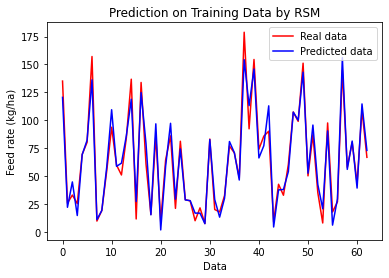

In [48]:
import matplotlib.pyplot as plt

plt.plot(data_RSM_train['Feed rate (kg/ha)'], color = 'red', label = 'Real data')
plt.plot(data_RSM_train['Feed rate predicted by model'], color = 'blue', label = 'Predicted data')
plt.title('Prediction on Training Data by RSM')
plt.xlabel('Data')
plt.ylabel('Feed rate (kg/ha)')
plt.legend()
plt.show()

In [46]:
print('Mean Squared Error :', mean_squared_error(data_RSM_train['Feed rate (kg/ha)'], data_RSM_train['Feed rate predicted by model']))
from sklearn.metrics import r2_score
r2 = r2_score(data_RSM_train['Feed rate (kg/ha)'], data_RSM_train['Feed rate predicted by model'])
print('The co-efficient of determination = ', r2)
print("RMSE",np.sqrt(mean_squared_error(data_RSM_train['Feed rate (kg/ha)'], data_RSM_train['Feed rate predicted by model'])))

Mean Squared Error : 88.5763761904762
The co-efficient of determination =  0.953376549125267
RMSE 9.411502334403163


In [54]:
data_RSM_test=pd.read_csv(r"C:\Users\ASUS\Desktop\Applied_AI_Course\Ritu Project\Test data (RSM).csv")
data_RSM_test.head()

,Sl No.,No. of metering holes (A),Shaft speed (rpm) (B),Drum fill level (%) C,Actual Feed rate (kg/ha),Feed rate predicted by equation from RSM
0,1,12,30,25,29.32,28.55
1,2,16,30,50,43.44,56.29
2,3,16,40,75,30.50,37.48
3,4,8,40,50,24.59,37.55
4,5,28,50,25,60.48,66.60


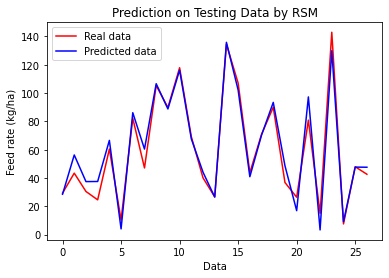

In [55]:
import matplotlib.pyplot as plt

plt.plot(data_RSM_test['Actual Feed rate (kg/ha)'], color = 'red', label = 'Real data')
plt.plot(data_RSM_test['Feed rate predicted by equation from RSM'], color = 'blue', label = 'Predicted data')
plt.title('Prediction on Testing Data by RSM')
plt.xlabel('Data')
plt.ylabel('Feed rate (kg/ha)')
plt.legend()
plt.show()

In [56]:
print('Mean Squared Error :', mean_squared_error(data_RSM_test['Actual Feed rate (kg/ha)'], data_RSM_test['Feed rate predicted by equation from RSM']))
from sklearn.metrics import r2_score
r2 = r2_score(data_RSM_test['Actual Feed rate (kg/ha)'], data_RSM_test['Feed rate predicted by equation from RSM'])
print('The co-efficient of determination = ', r2)
print("RMSE",np.sqrt(mean_squared_error(data_RSM_test['Actual Feed rate (kg/ha)'], data_RSM_test['Feed rate predicted by equation from RSM'])))

Mean Squared Error : 57.66803703703707
The co-efficient of determination =  0.9586082479085758
RMSE 7.593947394934802
